<div class="alert alert-block alert-success">
    <h1 align="center">Intro to Machine Learning</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [3]:
%%capture
!pip install pycaret

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.utils
import matplotlib

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from pycaret.clustering import *
from pycaret.regression import *
from pycaret.classification import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [6]:
c_vac = pd.read_csv("country_vaccinations.csv")

In [7]:
c_vac_manf = pd.read_csv("country_vaccinations_by_manufacturer.csv") 

## EDA

In [8]:
c_vac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [9]:
c_vac_manf.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


In [10]:
c_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [11]:
c_vac.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [12]:
c_vac['vaccines'].value_counts(normalize = True)*100

Oxford/AstraZeneca                                                                             15.380922
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  13.181818
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                    8.284251
Oxford/AstraZeneca, Sinopharm/Beijing                                                           7.580026
Oxford/AstraZeneca, Pfizer/BioNTech                                                             6.587708
Moderna, Pfizer/BioNTech                                                                        4.737516
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                               4.631882
Pfizer/BioNTech                                                                                 3.697183
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                    3.293854
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V

In [13]:
c_vac.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

## Data Preprocessing

In [14]:
# Droping Useless Columns
c_vac = c_vac.drop(['source_name','source_website'],axis=1)

In [15]:
c_vac

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing


In [16]:
# Resolving Null values
c_vac['people_fully_vaccinated_per_hundred']=c_vac['people_fully_vaccinated_per_hundred'].replace({np.nan:c_vac['people_fully_vaccinated_per_hundred'].mean()})

In [17]:
c_vac['people_vaccinated']=c_vac['people_vaccinated'].replace({np.nan:c_vac['people_vaccinated'].mean()})

In [18]:
c_vac['people_fully_vaccinated']=c_vac['people_fully_vaccinated'].replace({np.nan:c_vac['people_fully_vaccinated'].mean()})

In [19]:
c_vac['daily_vaccinations_raw']=c_vac['daily_vaccinations_raw'].replace({np.nan:c_vac['daily_vaccinations_raw'].mean()})

In [20]:
c_vac['total_vaccinations_per_hundred']=c_vac['total_vaccinations_per_hundred'].replace({np.nan:c_vac['total_vaccinations_per_hundred'].mean()})

In [21]:
c_vac['people_vaccinated_per_hundred']=c_vac['people_vaccinated_per_hundred'].replace({np.nan:c_vac['people_vaccinated_per_hundred'].mean()})

In [22]:
c_vac['people_fully_vaccinated_per_hundred']=c_vac['people_fully_vaccinated_per_hundred'].replace({np.nan:c_vac['people_fully_vaccinated_per_hundred'].mean()})

In [23]:
c_vac['total_vaccinations']=c_vac['total_vaccinations'].replace({np.nan:c_vac['total_vaccinations'].mean()})

In [24]:
c_vac['daily_vaccinations']=c_vac['daily_vaccinations'].replace({np.nan:c_vac['daily_vaccinations'].mean()})

In [25]:
c_vac['daily_vaccinations_per_million']=c_vac['daily_vaccinations_per_million'].replace({np.nan:c_vac['daily_vaccinations_per_million'].mean()})

In [26]:
# c_vac = pd.get_dummies(c_vac,columns=["vaccines"])

In [27]:
c_vac.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

## Strorytelling - Visualization

In [28]:
x_iri = c_vac.loc['IRN']
x_iri

KeyError: 'IRN'

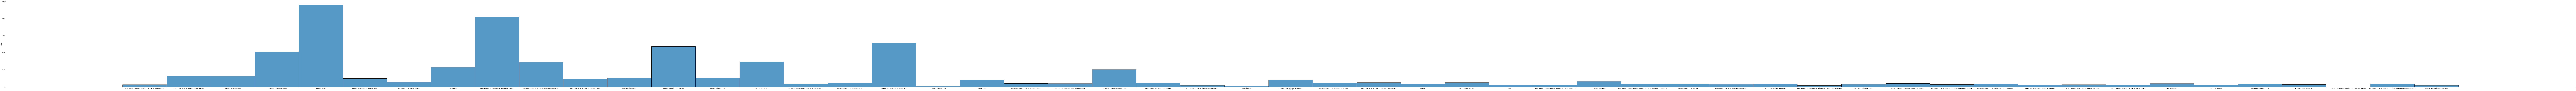

In [27]:
sns.displot(c_vac, x="vaccines" , aspect = 28 , height = 12 )
# the Plot is vissible just open it an new tab and 

In [28]:
c_vac

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
iso_code,,,,,,,,,,,,
AFG,Afghanistan,2021-02-22,0.000000e+00,0.000000e+00,3.293973e+06,227366.073989,114971.789486,0.000000,0.000000,12.340698,3426.365969,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
AFG,Afghanistan,2021-02-23,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
AFG,Afghanistan,2021-02-24,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
AFG,Afghanistan,2021-02-25,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
AFG,Afghanistan,2021-02-26,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,Zimbabwe,2021-07-11,1.491397e+06,8.959800e+05,5.954170e+05,227366.073989,18598.000000,10.030000,6.030000,4.010000,1251.000000,Sinopharm/Beijing
ZWE,Zimbabwe,2021-07-12,1.531868e+06,9.263120e+05,6.055560e+05,40471.000000,23205.000000,10.310000,6.230000,4.070000,1561.000000,Sinopharm/Beijing
ZWE,Zimbabwe,2021-07-13,1.575539e+06,9.556560e+05,6.198830e+05,43671.000000,27567.000000,10.600000,6.430000,4.170000,1855.000000,Sinopharm/Beijing


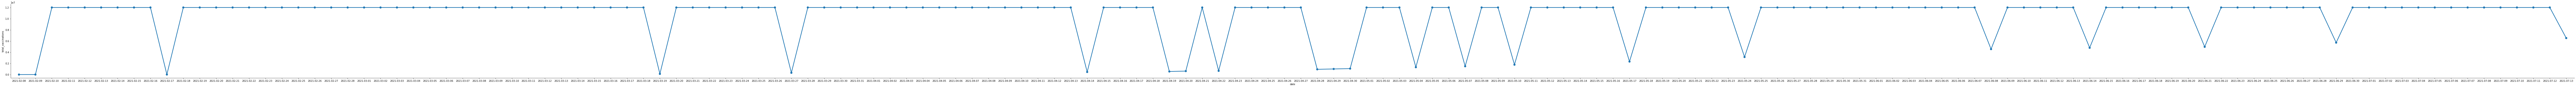

In [29]:
sns.catplot(x="date", y="total_vaccinations", kind="point", data=x_iri, aspect = 30 , height = 5)
# the Plot is vissible just open it an new tab and 

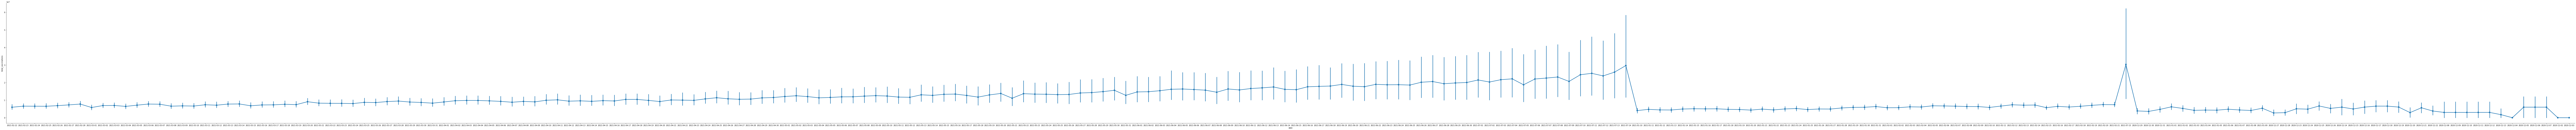

In [36]:
sns.catplot(x="date", y="total_vaccinations", kind="point", data=c_vac , aspect = 20 , height = 10)

<AxesSubplot:>

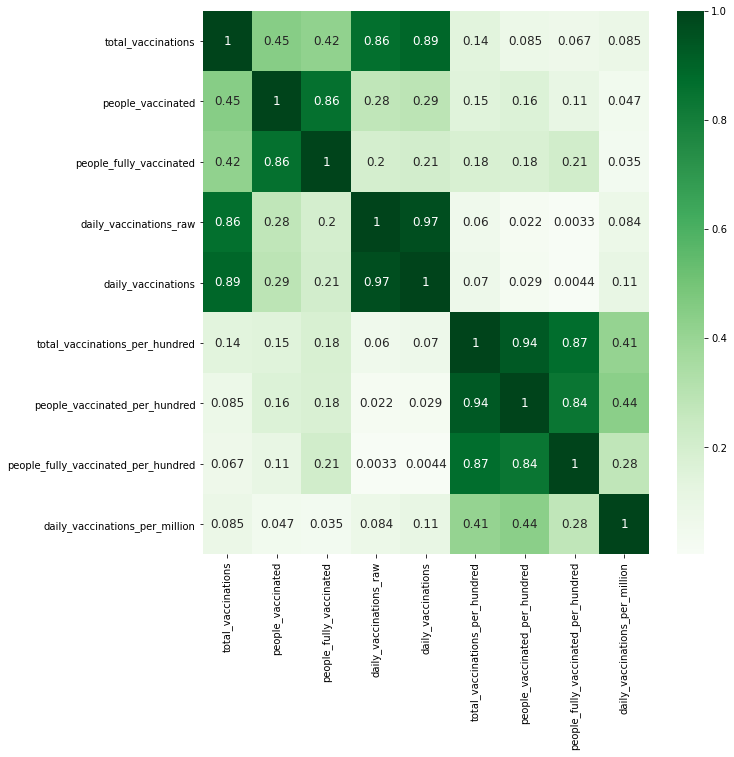

In [39]:
# this is world wide data corr
t_corr = c_vac.corr()
plt.figure(figsize=(10,10))
sns.heatmap(t_corr, annot=True, annot_kws={'size':12}, cmap='Greens' )

<AxesSubplot:>

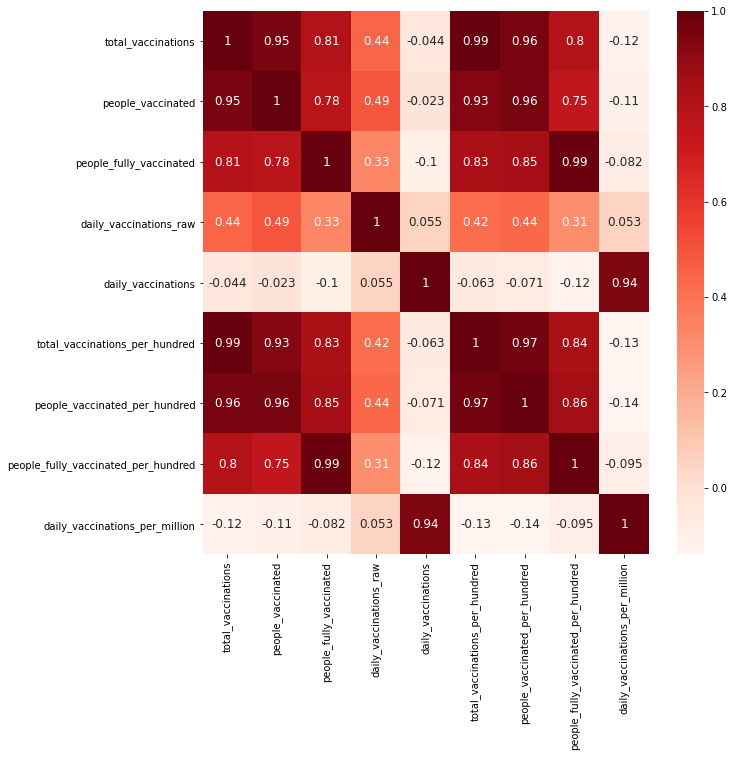

In [41]:
# this is IRI corr
t_corr_iri = x_iri.corr()
plt.figure(figsize=(10,10))
sns.heatmap(t_corr_iri, annot=True, annot_kws={'size':12}, cmap='Reds' )

## Train your model

In [29]:
c_vac = c_vac.drop(['country','iso_code' , 'date' , 'vaccines'] , axis = 1)

In [30]:
c_vac = c_vac.drop(['source_website','source_name'] , axis = 1)

KeyError: "['source_website' 'source_name'] not found in axis"

In [31]:
c_vac

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.000000e+00,0.000000e+00,3.293973e+06,227366.073989,114971.789486,0.000000,0.000000,12.340698,3426.365969
1,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000
2,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000
3,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000
4,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000
...,...,...,...,...,...,...,...,...,...
31235,1.491397e+06,8.959800e+05,5.954170e+05,227366.073989,18598.000000,10.030000,6.030000,4.010000,1251.000000
31236,1.531868e+06,9.263120e+05,6.055560e+05,40471.000000,23205.000000,10.310000,6.230000,4.070000,1561.000000
31237,1.575539e+06,9.556560e+05,6.198830e+05,43671.000000,27567.000000,10.600000,6.430000,4.170000,1855.000000
31238,1.613640e+06,9.887460e+05,6.248940e+05,38101.000000,30698.000000,10.860000,6.650000,4.200000,2065.000000


In [206]:
# go back and run the null value handling commands again
# c_vac = c_vac.drop(['country','iso_code' , 'vaccines' , 'date' , 'source_name','source_website'] , axis = 1)
c_vac

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website
0,0.000000e+00,0.000000e+00,3.293973e+06,227366.073989,114971.789486,0.000000,0.000000,12.340698,3426.365969,World Health Organization,https://covid19.who.int/
1,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,World Health Organization,https://covid19.who.int/
2,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,World Health Organization,https://covid19.who.int/
3,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,World Health Organization,https://covid19.who.int/
4,1.200444e+07,5.704551e+06,3.293973e+06,227366.073989,1367.000000,29.283554,19.181574,12.340698,35.000000,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...
31235,1.491397e+06,8.959800e+05,5.954170e+05,227366.073989,18598.000000,10.030000,6.030000,4.010000,1251.000000,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31236,1.531868e+06,9.263120e+05,6.055560e+05,40471.000000,23205.000000,10.310000,6.230000,4.070000,1561.000000,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31237,1.575539e+06,9.556560e+05,6.198830e+05,43671.000000,27567.000000,10.600000,6.430000,4.170000,1855.000000,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31238,1.613640e+06,9.887460e+05,6.248940e+05,38101.000000,30698.000000,10.860000,6.650000,4.200000,2065.000000,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [32]:
# at this step im trying to set var of datas between 1 and zero maualy to make PCA more efficent
scaler = MinMaxScaler()
c_vac = scaler.fit_transform(c_vac)

In [33]:
c_vac_df = pd.DataFrame(data = c_vac , columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'])

In [34]:
c_vac_df

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.000000,0.000000,0.014751,0.009190,0.005127,0.000000,0.000000,0.106670,0.028851
1,0.008416,0.009171,0.014751,0.009190,0.000061,0.126032,0.164423,0.106670,0.000295
2,0.008416,0.009171,0.014751,0.009190,0.000061,0.126032,0.164423,0.106670,0.000295
3,0.008416,0.009171,0.014751,0.009190,0.000061,0.126032,0.164423,0.106670,0.000295
4,0.008416,0.009171,0.014751,0.009190,0.000061,0.126032,0.164423,0.106670,0.000295
...,...,...,...,...,...,...,...,...,...
31235,0.001046,0.001440,0.002666,0.009190,0.000829,0.043168,0.051689,0.034662,0.010534
31236,0.001074,0.001489,0.002712,0.001636,0.001035,0.044373,0.053403,0.035180,0.013144
31237,0.001105,0.001536,0.002776,0.001765,0.001229,0.045621,0.055117,0.036045,0.015620
31238,0.001131,0.001590,0.002798,0.001540,0.001369,0.046740,0.057003,0.036304,0.017388


In [35]:
# and now im tryng to find the optimal 'n-components' value
pca = PCA(n_components = 0.95)
pca.fit(c_vac)
reduced = pca.transform(c_vac)

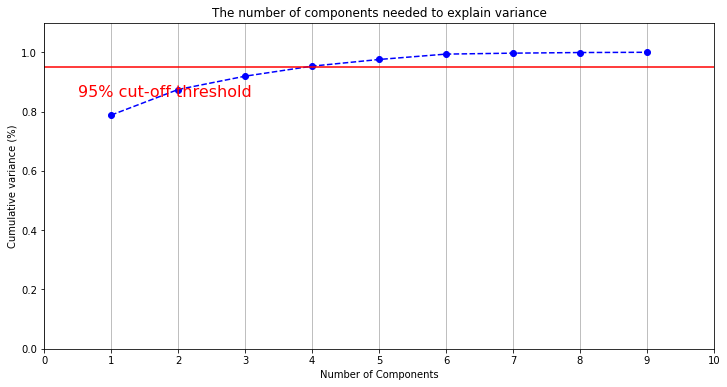

In [36]:
pca = PCA().fit(c_vac)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [37]:
regressor = setup(data = c_vac_df , target = 'total_vaccinations' , normalize = True , session_id = 123 , pca=True , pca_method='linear', pca_components=4)

,Description,Value
0,session_id,123
1,Target,total_vaccinations
2,Original Data,"(31240, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(21867, 4)"


In [38]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0004,0.0000,0.0053,0.9706,0.0035,13.3180,0.7570
xgboost,Extreme Gradient Boosting,0.0006,0.0001,0.0062,0.9472,0.0041,59.2858,0.6400
gbr,Gradient Boosting Regressor,0.0013,0.0001,0.0078,0.9332,0.0053,246.2580,0.8710
rf,Random Forest Regressor,0.0006,0.0001,0.0083,0.9227,0.0053,11.6421,2.4810
knn,K Neighbors Regressor,0.0007,0.0001,0.0099,0.9030,0.0063,8.2074,0.0190
lightgbm,Light Gradient Boosting Machine,0.0010,0.0001,0.0101,0.8990,0.0066,113.3419,0.2150
dt,Decision Tree Regressor,0.0006,0.0001,0.0079,0.8978,0.0052,9.2318,0.0750
ada,AdaBoost Regressor,0.0046,0.0001,0.0102,0.8897,0.0077,1852.9967,0.1410
lr,Linear Regression,0.0028,0.0002,0.0127,0.8371,0.0087,805.9687,0.3330
ridge,Ridge Regression,0.0028,0.0002,0.0127,0.8371,0.0087,805.9893,0.0070


## Test the model and show the metrics

In [39]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0005,0.0000,0.0065,0.9810,0.0042,4.4932
1,0.0002,0.0000,0.0014,0.9923,0.0012,6.0182
2,0.0004,0.0000,0.0054,0.9652,0.0038,4.1713
3,0.0004,0.0000,0.0066,0.9546,0.0040,6.3825
4,0.0003,0.0000,0.0042,0.9814,0.0030,6.2506
5,0.0004,0.0000,0.0036,0.9877,0.0025,3.2029
6,0.0006,0.0001,0.0098,0.9334,0.0060,10.2531
7,0.0002,0.0000,0.0022,0.9940,0.0019,1.7573
8,0.0006,0.0001,0.0087,0.9352,0.0053,50.8579
9,0.0004,0.0000,0.0042,0.9812,0.0031,39.7930


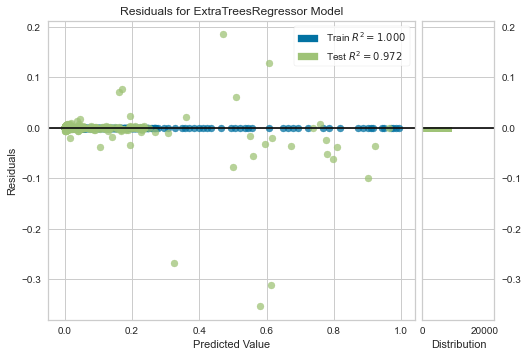

In [40]:
plot_model(et)

In [41]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Save your final model

In [42]:
save_model(et , 'my et model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_vaccinations',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

In [43]:
loaded_model = load_model('my et model')

Transformation Pipeline and Model Successfully Loaded


In [45]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0004,0.0000,0.0065,0.9721,0.0041,4.4194


,Component_1,Component_2,Component_3,Component_4,total_vaccinations,Label
0,-0.224730,-0.001025,-0.229961,-0.676641,0.008416,0.008416
1,4.696628,-0.555026,0.003093,0.900568,0.024633,0.024729
2,-2.105784,0.304196,-0.048247,0.071151,0.000015,0.000038
3,-1.482072,0.352813,-0.176235,-0.399529,0.000011,0.000026
4,-0.140018,-0.030148,-0.162670,-0.403851,0.008416,0.008416
...,...,...,...,...,...,...
9368,-2.151711,0.512050,-0.002182,-0.085191,0.000508,0.000367
9369,4.999882,-2.529504,0.649570,-1.203544,0.004416,0.004110
9370,-0.282324,-0.150810,0.119172,0.282400,0.003619,0.004583
9371,-1.621102,0.314123,0.156320,0.250980,0.000595,0.000482


In [ ]:
# target : total_vaccinations

# !!!!!!!!!!!!!!! We used PCA to reduce dimensions !!!!!!!!!!!!!!!!!!!!!!
# it means that we combined some of the features in one major feature

# people_vaccinated
# people_fully_vaccinated
# daily_vaccinations_raw
# daily_vaccinations
# total_vaccinations_per_hundred
# people_vaccinated_per_hundred
# people_fully_vaccinated_per_hundred
# daily_vaccinations_per_million

In [ ]:
# M.Hossein Hashemi